In [1]:
import pickle
import numpy as np
import ase.io
from ase.io import extxyz
from ase.build import fcc100, add_adsorbate, molecule
from ase import Atoms
from ase.calculators.emt import EMT
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
import os

import ase.io
from ase.build import bulk
from ase.build import fcc100, add_adsorbate, molecule
from ase.constraints import FixAtoms
from ase.calculators.emt import EMT
from ase.optimize import BFGS
import matplotlib.pyplot as plt
import lmdb
import pickle
from tqdm import tqdm
import torch
import os
from pymatgen.core.composition import Composition
from ocpmodels.preprocessing import AtomsToGraphs
from ocpmodels.datasets import SinglePointLmdbDataset, TrajectoryLmdbDataset



In [2]:
dataset = SinglePointLmdbDataset({"src": "/miniscratch/tengmeli/ocp/LMDB/val_cat.lmdb"})

In [3]:
len(dataset)

10870

In [4]:
dataset[0]

Data(atomic_numbers=[30], cell=[1, 3, 3], cell_offsets=[454, 3], edge_index=[2, 454], fixed=[30], force=[30, 3], natoms=30, pos=[30, 3], pos_relaxed=[30, 3], sid=0, tags=[30], y_init=-53.21524266, y_relaxed=-54.98751774)

In [5]:
energies = torch.tensor([data.y_relaxed-data.y_init for data in dataset])

In [6]:
torch.mean(energies)

tensor(-5.4565)

In [7]:
torch.std(energies)

tensor(3.7140)

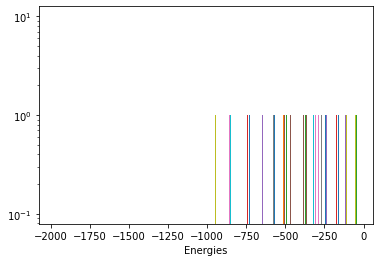

In [19]:
plt.hist(energies, bins = 10)
plt.yscale("log")
plt.xlabel("Energies")
plt.show()